# Example of Classification task

[Notebook on Colab](https://colab.research.google.com/drive/1c5svU97BKXJGr8q-XM8QU2tnXOFyLCfs).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading data

In [7]:
data = pd.read_csv('../datasets/points.csv', names=['First Exam', 
                                                     'Second Exam',
                                                     'Admitted'])

In [9]:
data[:10]

,First Exam,Second Exam,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


Data for training

In [10]:
X = data.iloc[:, :-1]

In [12]:
X[:10]

,First Exam,Second Exam
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376
5,45.083277,56.316372
6,61.106665,96.511426
7,75.024746,46.554014
8,76.098787,87.420570
9,84.432820,43.533393


Labels

In [11]:
y = data.iloc[:, -1]

In [13]:
y[:10]

0    0
1    0
2    0
3    1
4    1
5    0
6    1
7    1
8    1
9    1
Name: Admitted, dtype: int64

## Visualizing the data

In [15]:
admitted = data[data.Admitted == 1]
not_admitted = data[data.Admitted == 0]

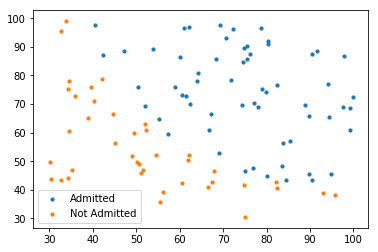

In [20]:
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

## Train Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

Creating and training the model

In [31]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Using the model to predict admission

In [30]:
predicted_classes = model.predict(X)

## Evaluating the quality of classification

Accuracy

In [32]:
from sklearn.metrics import accuracy_score 

In [34]:
accuracy = accuracy_score(y,predicted_classes)

In [35]:
accuracy

0.87

Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y,predicted_classes)

array([[27, 13],
       [ 0, 60]], dtype=int64)

Perfect Predictions

In [41]:
confusion_matrix(y,y)

array([[40,  0],
       [ 0, 60]], dtype=int64)

Precision and Recall

In [42]:
from sklearn.metrics import precision_score, recall_score

In [43]:
precision_score(y,predicted_classes)

0.821917808219178

In [45]:
60/(60+13)

0.821917808219178

In [44]:
recall_score(y,predicted_classes)

1.0

In [46]:
60/(60+0)

1.0

F1 Score

In [47]:
from sklearn.metrics import f1_score

In [48]:
f1_score(y,predicted_classes)

0.9022556390977443

In [49]:
60/(60+(13+0)/2)

0.9022556390977443

## Threshold

In [50]:
predicted_classes[:10]

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [51]:
predicted_probas = model.predict_proba(X)

In [52]:
predicted_probas[:10]

array([[0.53704829, 0.46295171],
       [0.79800178, 0.20199822],
       [0.56471269, 0.43528731],
       [0.25141181, 0.74858819],
       [0.1860787 , 0.8139213 ],
       [0.60341331, 0.39658669],
       [0.19106567, 0.80893433],
       [0.39446729, 0.60553271],
       [0.14963269, 0.85036731],
       [0.33257341, 0.66742659]])

In [62]:
threshold = 0.6

In [63]:
predicted_classes_with_threshold = np.where(predicted_probas[:, 1] > threshold, 1, 0)

In [64]:
accuracy_with_threshold = accuracy_score(y,predicted_classes_with_threshold)

In [65]:
accuracy_with_threshold

0.9

In [66]:
confusion_matrix(y,predicted_classes_with_threshold)

array([[35,  5],
       [ 5, 55]], dtype=int64)

## Exercises

1. Try to use various threshold values and study hot it influences the quality (accuracy, precision, recall and F1 score)

## ROC/AUC

In [72]:
from sklearn.metrics import roc_curve

In [73]:
fpr, tpr, thresholds = roc_curve(y, predicted_classes_with_threshold)

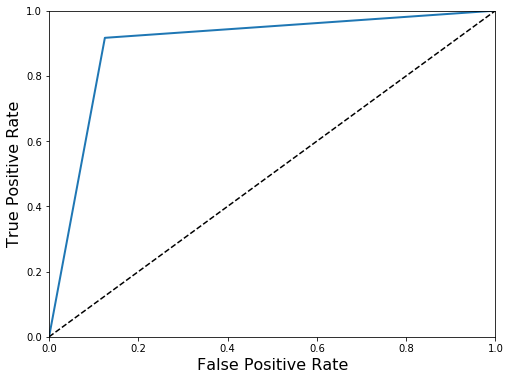

In [74]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [75]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, predicted_classes_with_threshold)

0.8958333333333333

## SGD Classifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [86]:
predicted_classes_knn = knn.predict(X)

In [87]:
accuracy = accuracy_score(y,predicted_classes_knn)
accuracy

0.95

## Exercises

1. Print confusion matrix for the k-nn Classifier.
2. Print precision, recall and F1 score for the k-nn Classifier.
3. Draw the ROC curve for k-nn Classifier.
4. Print the AUC score fot k-nn Classifier.
5. Try to use various n_neighbors values and study hot it influences the quality (accuracy, precision, recall and F1 score)